# Machine Learning - 02_LogisticRegression

In [1]:
from IPython.display import Image

### Logistic Regression 이란?  

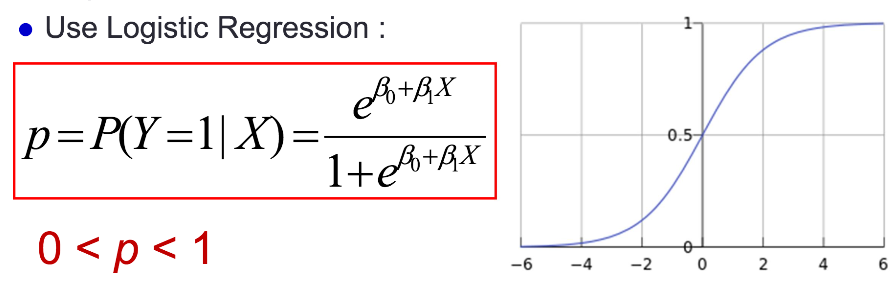

In [2]:
no = "043"
w= 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [1]:
# 패키지 imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf 

%matplotlib inline

## Example Linear Regrsssion  
### DataSet :  Default

In [2]:
path = "data/Default.xlsx"
Default = pd.read_excel(path)

* 자료 설명  
고객 정보를 담은 모의 데이터로 만 명의 고객 정보를 학습해 모델을 만들어 향후 누가 채무불이행을 할 지를 예측하기 위함.
 
Format : A data frame with 10000 observations on the following 4 variables.

default (채무 불이행: 불이행(Yes), 이행(No) ): A factor with levels No and Yes indicating whether the customer defaulted on their debt

student (학생: Yes가 학생) : A factor with levels No and Yes indicating whether the customer is a student

balance (잔고) : The average balance that the customer has remaining on their credit card after making their monthly payment

income (수입) : Income of customer

In [3]:
Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [4]:
Default.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [5]:
Default.describe(include='all')

,Unnamed: 0,default,student,balance,income
count,10000.00000,10000,10000,10000.000000,10000.000000
unique,NaN,2,2,NaN,NaN
top,NaN,No,No,NaN,NaN
freq,NaN,9667,7056,NaN,NaN
mean,5000.50000,NaN,NaN,835.374886,33516.981876
std,2886.89568,NaN,NaN,483.714985,13336.639563
min,1.00000,NaN,NaN,0.000000,771.967729
25%,2500.75000,NaN,NaN,481.731105,21340.462903
50%,5000.50000,NaN,NaN,823.636973,34552.644802
75%,7500.25000,NaN,NaN,1166.308386,43807.729272


In [6]:
Default.default.value_counts()

No     9667
Yes     333
Name: default, dtype: int64

* 'default' column의 element가 총 10000개 인데 unique한 값이 'No', 'Yes' 2개이고, 'No'가 9667개. 
즉, 앞도적으로 'default' 하지 않은 사람이 많음
* default가 "Yes" 로 default한 사람은 333명. default (채무불이행) 한 사람은 전체 10000 명 중 3.3% 밖에 안됨
* 이처럼 classification 을 할 때 'No'처럼 어느 한 label/class의 sample수가 압도적으로 많거나/작아 다른 class의 sample 수와 균형이 맞지 않을 때 이 상황을 class imbalance 를 보인다 함



In [7]:
Default.student.value_counts()
# 학생이 30퍼센트

No     7056
Yes    2944
Name: student, dtype: int64

In [8]:
pd.crosstab(Default.student, Default.default)
# 학생이 아닌 사람 중 채무불이행 : 0.03
# 학생인 사람 중 채무불이행 : 0.045
# ---> 학생인 여부가 거의 50% 이상의 증가...

default,No,Yes
student,,
No,6850,206
Yes,2817,127


* 10000명 전체의 balance 평균이 835인데 default한 사람과 안한 사람에 따라 balance가 다를까? 

In [9]:
Default.balance.groupby(by=Default['default']).mean()

default
No      803.94375
Yes    1747.82169
Name: balance, dtype: float64

* Default 한사람은 평균 1747, 안한 사람은 803으로 차이가 있음!!!

In [10]:
# default 한 집단과 안한 집단에 따른 'balance'의 statistics를 자세히 보자 
Default.balance.groupby(by=Default['default']).describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
No,9667.0,803.94375,456.476236,0.000000,465.714646,802.857102,1128.248851,2391.007739
Yes,333.0,1747.82169,341.266808,652.397134,1511.610952,1789.093391,1988.869747,2654.322576


In [11]:
# default 한 집단과 안한 집단에 따른 'income'의 statistics;
Default.income.groupby(by=Default['default']).describe()

,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
No,9667.0,33566.166625,13318.251249,771.967729,21405.060662,34589.488060,43823.756308,73554.233495
Yes,333.0,32089.147124,13804.221110,9663.788159,19027.508633,31515.344493,43067.333736,66466.460891


* 그래프화

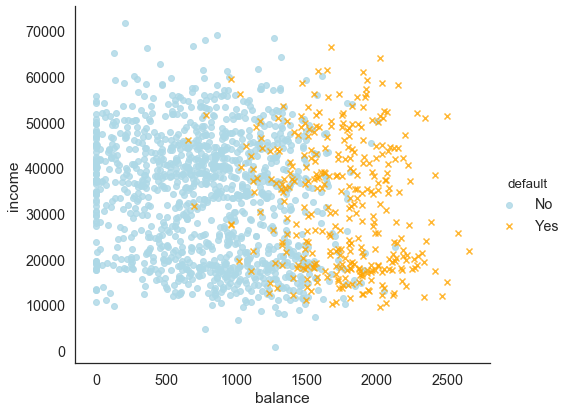

In [12]:
some_of_No = pd.concat([ Default.loc[Default.default == 'No', :].sample(n=1200),  
                        Default.loc[Default.default == 'Yes', :] ], axis=0 )

sns.set(style='white', font_scale=1.3)
def_palette = {'No':'lightblue', 'Yes':'orange'}

sns.lmplot('balance', 'income', data=some_of_No, 
           hue='default', fit_reg=False, markers=['o', 'x'], height=6, aspect=1.2, palette=def_palette)

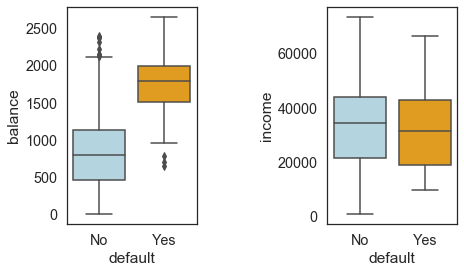

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.subplots_adjust(wspace=1)

sns.boxplot('default', 'balance', data=Default, orient='v',ax=ax1, palette=def_palette)
sns.boxplot('default', 'income', data=Default, orient='v', ax=ax2, palette=def_palette)

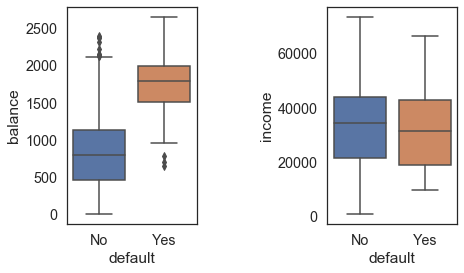

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(7, 4))
fig.subplots_adjust(wspace=1)

sns.boxplot('default', 'balance', data=Default,ax=ax1)
sns.boxplot('default', 'income', data=Default, ax=ax2)

Maximum Liklihood Estimation (MLE) 방법을 사용해 $\beta_0, \beta_1$을 구한다

* 카테고리 변수들을 dummy variable을 사용해 encoding

In [15]:
Default_enc = pd.get_dummies(Default, drop_first=True)
Default_enc.head()

,Unnamed: 0,balance,income,default_Yes,student_Yes
0,1,729.526495,44361.625074,0,0
1,2,817.180407,12106.134700,0,1
2,3,1073.549164,31767.138947,0,0
3,4,529.250605,35704.493935,0,0
4,5,785.655883,38463.495879,0,0


* 'default' 경우에 default_Yes 가 1
* 'student' 일 경우에 student_Yes 가 1

In [16]:
# import scikit-learn LogisticRegression estimator
from sklearn.linear_model import LogisticRegression

* 참고 : LogisticRegression Estimator를 instantiate할 때 설정할 수 있는 hyperparameter 가 많은데 그 중에 'solver'가 있음. 이는 최적화와 Regularization과 관여. 기본 설정은 ‘liblinear’ 로 데이터가 크지 않을 때 적합. Response가 Multi-class 일 경우엔 ‘newton-cg’, ‘sag’, ‘lbfgs’ 중에 씀.

In [17]:
# Instantiate the estimator with the solver 'newton-cg' 
logistic_reg = LogisticRegression(solver='newton-cg', n_jobs=-1)

# Training set로 모든 observations을 사용.  Predictor로는 'balance' 
#예전 방식 :Default_enc.balance.reshape(-1.1)
X = Default_enc.balance.values.reshape(-1, 1)  # LogisticRegression이 X를 2D로 인터페이스하기에 reshape하여 nx1 행렬로

# Response로는 Default_Yes 
y = Default_enc.default_Yes

In [18]:
# Fit the model 
logistic_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print ('classes: ' + str(logistic_reg.classes_))
print ('intercept :'+ str(logistic_reg.intercept_))
print ('coefficient: '+ str(logistic_reg.coef_))

classes: [0 1]
intercept :[-10.65132065]
coefficient: [[0.00549891]]


* 예측  
Logistic Regression은 Classification에 사용하기에 Response의 클래스(카테고리)를 추정.  
Logistic Regression을 포함한 대부분의 Classifier는 Response의 클래스(카테고리)를 추정할 때 내부적으론 실수 값 확률을 보고 판단한다. Logistic Regression의 경우엔 Logistic 함수의 출력인 (0, 1) 사이의 확률을 보고 기본적으로 0.5이상이면 1, 이하이면 0 으로 클래스를 결정한다.


In [20]:
# balance가 1000 , 2000일 때 'default'할 확률
X_new = np.array([1000, 2000]).reshape(-1,1)
logistic_reg.predict_proba(X_new) 

array([[0.99424783, 0.00575217],
       [0.41423112, 0.58576888]])

In [21]:
# 추정한 response를 클래스로 달라고 요청.
logistic_reg.predict(X_new)

array([0, 1], dtype=uint8)

* student_yes 를 변수로 사용

In [22]:
type(Default_enc.student_Yes)

pandas.core.series.Series

In [23]:
type(Default_enc.student_Yes.values)

numpy.ndarray

In [24]:
logistic_reg = LogisticRegression(solver='newton-cg')  
X = Default_enc.student_Yes.values.reshape(-1, 1)
y = Default_enc.default_Yes
logistic_reg.fit(X, y)
print ('classes: ' + str(logistic_reg.classes_))
print ('intercept :'+ str(logistic_reg.intercept_))
print ('coefficient: '+ str(logistic_reg.coef_))

classes: [0 1]
intercept :[-3.50213151]
coefficient: [[0.39959759]]


* 학생에 대응되는 coefficient가 0.39로 positive. 즉, 학생이면 default할 가능성이 높아진다.

In [25]:
# 위의 모델을 바탕으로 학생이 아닐때 예측
X_new = np.array([1, 0]).reshape(-1,1)
logistic_reg.predict_proba(X_new)

array([[0.95699715, 0.04300285],
       [0.97074836, 0.02925164]])

* income으로 예측

In [26]:
# logistic_reg = LogisticRegression(solver='newton-cg')  
logistic_reg = LogisticRegression(solver='lbfgs')  

X = Default_enc.income.values.reshape(-1, 1)
y = Default_enc.default_Yes
logistic_reg.fit(X, y)
print ('classes: ' + str(logistic_reg.classes_))
print ('intercept :'+ str(logistic_reg.intercept_))
print ('coefficient: '+ str(logistic_reg.coef_))

# 경고 문구..
# /Users/minkyukwon/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
#   warn('The line search algorithm did not converge', LineSearchWarning)
# /Users/minkyukwon/anaconda3/lib/python3.7/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
#   warn('The line search algorithm did not converge', LineSearchWarning)

# classes: [0 1]
# intercept :[-3.09222748]
# coefficient: [[-8.40368731e-06]]


classes: [0 1]
intercept :[-3.05552656e-08]
coefficient: [[-0.00010976]]


In [27]:
# 위의 모델을 바탕으로 학생이 아닐때 예측
X_new = np.array([1, 0]).reshape(-1,1)
logistic_reg.predict_proba(X_new)

array([[0.50002745, 0.49997255],
       [0.50000001, 0.49999999]])

## 문제 :  predictor로 '학생'인가, 아닌가 정보만 주면 두 경우 모두 (학습한) 모델은 'default' No 를 예측. 이런 예측은 당연히 예상되는데 기본적으로 학생이거나 아니거나 관계없이 대부분 'default' 하지 않음.  
그러나, 학생일 때 default 확률이 0.043으로 학생이 아닐 때의 0.029 보다 조금 더 높아지긴 했음



## Multiple Logistic Regression

In [28]:
X = Default_enc.loc[:, ['balance', 'income', 'student_Yes']]
X['income'] = X['income']*0.001
y = Default_enc.default_Yes

In [30]:
logistic_reg.fit(X, y)
print ('classes: ' + str(logistic_reg.classes_))
print ('intercept :'+ str(logistic_reg.intercept_))
print ('coefficient: '+ str(list(zip(X.columns, logistic_reg.coef_[0]) )))

classes: [0 1]
intercept :[-10.90180458]
coefficient: [('balance', 0.005730608378322663), ('income', 0.0039616174111136585), ('student_Yes', -0.6125699138816431)]


* 'student_Yes'의 coefficient가 음수 --> 학생이면 default할 가능성이 적어짐 

In [31]:
X_new = np.array([[1500, 40, 1],    # balance 1500, income 40, student
                  [1500, 40, 0]])   # balance 1500, income 40, non-student
logistic_reg.predict_proba(X_new)

array([[0.94047548, 0.05952452],
       [0.89542812, 0.10457188]])

* 위와 같이 하게 되면, 학생이 아닌 경우 default 가 0.0595dptj 0.1로 증가한다.

## category >2

In [33]:
path = "data/Smarket.csv"
Smarket = pd.read_csv(path, index_col=0)
Smarket.tail()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1246,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1247,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1248,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1249,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down
1250,2005,-0.298,0.130,-0.955,0.043,0.422,1.38254,-0.489,Down


In [34]:
Smarket.describe(include='all')

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Up
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,648
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138,NaN
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334,NaN
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000,NaN
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500,NaN
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500,NaN
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750,NaN


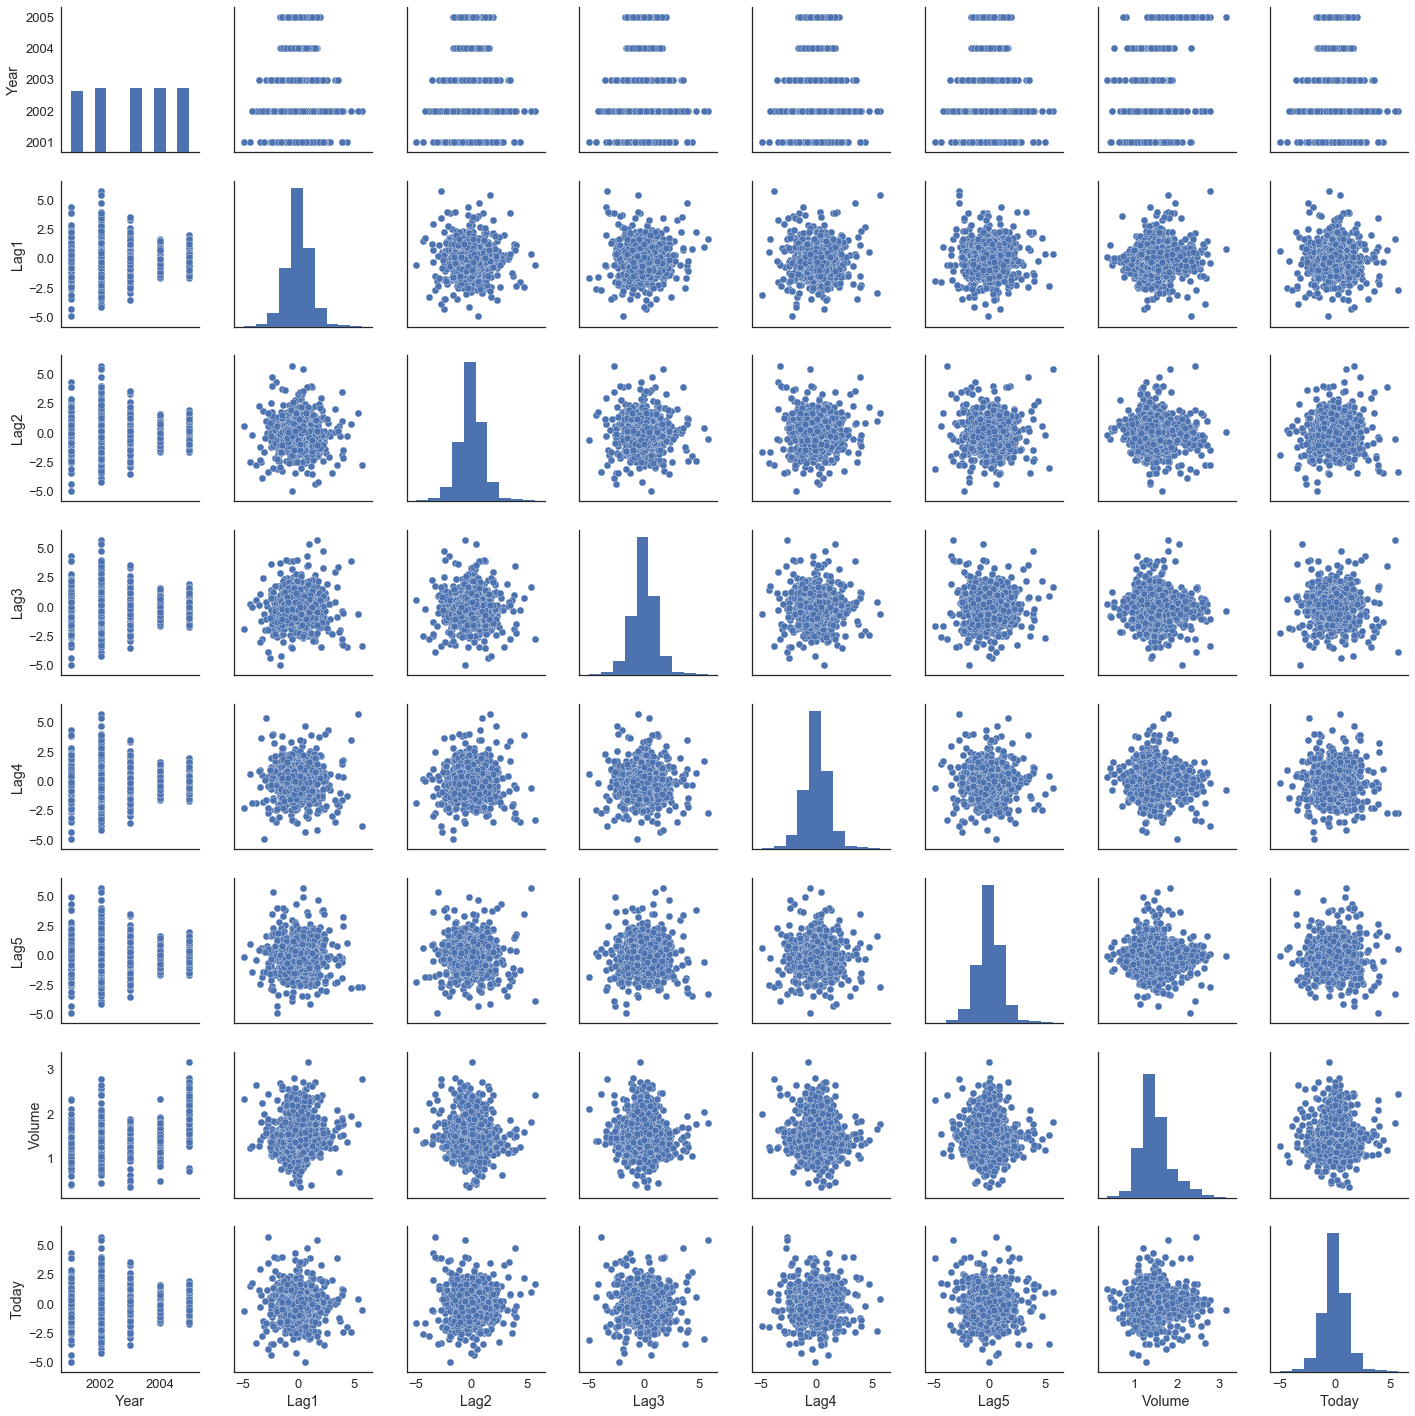

In [33]:
sns.pairplot(Smarket)

In [34]:
Smarket.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


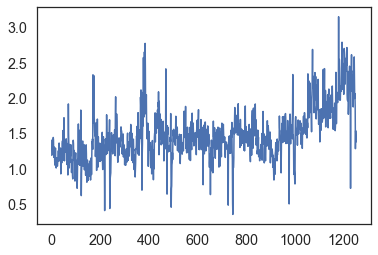

In [35]:
plt.plot(Smarket.Volume)

* Direction' column을 dummy encoding : Smarket의 'Direction' feature의 'Up' 을 1로 encoding

In [36]:
Smarket_enc = pd.get_dummies(Smarket, drop_first=True)
Smarket_enc.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,1
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,1
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,0
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,1
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,1


In [37]:
X = Smarket_enc.loc[:, 'Lag1':'Volume']
y = Smarket_enc.Direction_Up
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
print("Intercept:", logreg.intercept_)
print( list(zip(X.columns, logreg.coef_[0]) ))

Intercept: [-0.12107884]
[('Lag1', -0.0728438233276114), ('Lag2', -0.042235274433928625), ('Lag3', 0.011016099836884504), ('Lag4', 0.009283636651076843), ('Lag5', 0.010263449074427979), ('Volume', 0.1321083686675621)]


* Traning Performance : Training에 사용했던 데이터를 이용해 response 추정을 확률

In [40]:
list( zip(X.index, logreg.predict_proba(X=X)[:10, 1]) ) 

[(1, 0.5073437046486303),
 (2, 0.48174499259329334),
 (3, 0.4812980838785386),
 (4, 0.5153494899736936),
 (5, 0.5109913998592838),
 (6, 0.5070647038303314),
 (7, 0.49274928196958434),
 (8, 0.5092790175182677),
 (9, 0.5178331612231709),
 (10, 0.4890946117467889)]

* thresholding을 0.5에서 하는 predict()  에서 Up(1)을 몇 개 예측했나 확인

In [41]:
y_pred_class = logreg.predict(X=X)
y_pred_class.sum()

965

* 실제 y와 예측치/추정치가 몇 개나 일치하는 지 봄

In [42]:
(y == y_pred_class).sum()   

651

* 정확도(Accuracy)

In [43]:
(y == y_pred_class).mean()

0.5208

* 간단한 분석 : 모델을 학습시킬 때 사용했던 training set를 주어 추정을 한 정확도가 52% 정도이다. 그런데, 아래와 같이 원래 데이터의 'Direction'의 분포를 보니 전체 1250일 중에 648일이 'Up' 으로 'Down'인 602일 보다 많다. 따라서, 이 것만 보고 아예 예측을 항상 'Up' 이라고만 해도 정확성이 648/1250 -> 51.84%가 나온다. 즉, Null model의 baseline 정확도가 51.84% 다. 이 점을 고려하면, 위 logistic regression 모델의 training 성능의 정확성 0.5208 은 거의 baseline과 차이가 없다. 모델이 전혀 학습을 못했거나, 데이터 자체에 정보가 없는 것이다.

In [44]:
Smarket.Direction.value_counts()

Up      648
Down    602
Name: Direction, dtype: int64

## Confusion Matrix를 사용한 Classification 모델 평가

* 세팅 : Training/Test Split : 따라서, (학습이 끝난) 모델을 평가할 때에 학습에 쓰이지 않았던 데이터로 해야 함이 기본 생각. ISLR에서 Smarket 데이터는 2001년부터 2005년 까지의 데이터. 그래서 우리 생각은 2001~2004년 데이터 만으로 모델을 traning 시키고, 제외했던 (held-out) 2005년 것을 test data로 삼아 모델을 평가.

In [45]:
train_filter = Smarket_enc.Year < 2005

X_train = Smarket_enc.loc[train_filter, 'Lag1':'Volume']
y_train = Smarket_enc.loc[train_filter, 'Direction_Up']

X_test = Smarket_enc.loc[~train_filter, 'Lag1':'Volume']
y_test = Smarket_enc.loc[~train_filter, 'Direction_Up']

logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
# Test the model with the Test Set and get the estimated responses in probability 
y_test_pred_prob = logreg.predict_proba(X=X_test)
y_test_pred_prob[:5]    

array([[0.47268383, 0.52731617],
       [0.48411655, 0.51588345],
       [0.4768594 , 0.5231406 ],
       [0.48564818, 0.51435182],
       [0.50140487, 0.49859513]])

In [47]:
y_test_pred_class = logreg.predict(X=X_test)
y_test_pred_class[:5]

array([1, 1, 1, 1, 0], dtype=uint8)

In [48]:
[ 1 if prob>0.5 else 0 for prob in y_test_pred_prob[:, 1] ][:5]   # 첫 5개

[1, 1, 1, 1, 0]

## scikit-learn metrics 모듈을 활용한 Classifier 성능 분석

In [50]:
from sklearn import metrics
print ("Accuracy: " + str(metrics.accuracy_score(y_test, y_test_pred_class)))

Accuracy: 0.48412698412698413


* test set 정확도(Accuracy)가 baseline보다 낮고, 무작위로 찍을 경우인 50% 보다도 낮음.
* 예측 response가 실제 response (True response)를 얼마나 맞춘 가를 따지는 Accuracy는 classifier의 보다 심도있는 평가에는 부족한 점이 많다. (가령, training set 에 100개 샘플이 있는데 그 중 Up이 98, Down이 2개이다. 이 땐 baseline 기본만 하는 classifier는 항상 'Up' 이라고 할 것이다. 만약, test set의 Up, Down 분포가 training set 분포와 어느 정도 비슷하다면 이 baseline classifier의 accuracy는 대략 0,98 (98%) 정도일 가능성이 많다. 매우 좋은 숫자다. 그렇지만 이 classifier는 'Up'을 하나도 예측하지 못했다.


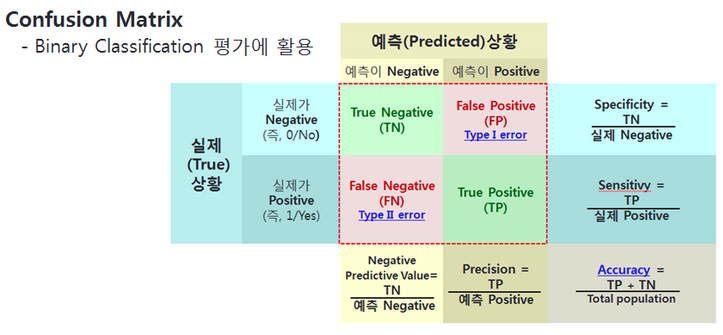

In [49]:
no = "044"
w= 500
img_path1 = "/Users/minkyukwon/PycharmProjects/MachineLearning_Course/10_1_ML_Intro/ref_img/img_"
img_path2 = ".png"
img_path = img_path1 + no + img_path2
Image(filename=img_path, width=w)

In [55]:
# scikit-learn이 제공하는 것 이용.  
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_class)   # 위 그림 참조  
print(conf_mat)

[[74 37]
 [93 48]]


In [53]:
# labels를 argument로 주면 label순으로 배열 
conf_mat = metrics.confusion_matrix(y_test, y_test_pred_class, labels=[1,0])   # 'labels' argument 지정 
print(conf_mat)

[[48 93]
 [37 74]]


In [61]:
# 정확도 계산 : 메트릭스에서 계산
print conf_mat[0,0] + conf_mat[1,1]
print conf_mat.sum()
print (conf_mat[0,0] + conf_mat[1,1]) /conf_mat.sum()
print (float(conf_mat[0,0]) + float(conf_mat[1,1])) /float(conf_mat.sum())

122
252
0
0.484126984127


In [58]:
# 정확도 계산
print(metrics.classification_report(y_test, y_test_pred_class , digits=4))

             precision    recall  f1-score   support

          0     0.4431    0.6667    0.5324       111
          1     0.5647    0.3404    0.4248       141

avg / total     0.5111    0.4841    0.4722       252

